**Лабораторная работа №2**. Языкова Мария

Изначально пользователь вводит количество углов для фигуры.

*   0 углов: круг
*   3 угла: треугольник
*   4 угла: четырёхугольник
*   n > 4 углов: n - угольник

Если фигура - круг, то пользователь вводит радиус. Иначе - углы и стороны.

Если фигура пользователя не проходит проверки, ему предлагается изменить углы, стороны или углы и стороны вместе.

Пользователь видит информацию о своей фигуре и её график.

Пользователю предлагается поэксперементировать с фигурой: поменять углы или стороны. Если новая фигура пользователя не проходит проверки, ему заново предлагается поменять углы или стороны. Если проходит, пользователь видит инфомацию о новой фигуре и её график.


**Примеры ввода фигур, которые точно существуют:**

Круг:
*   0
*   3

Треугольник:
*   3
*   60 60 60
*   5 5 5

Квадрат:
*   4
*   90 90 90 90
*   5 5 5 5

Прямоугольник:
*   4
*   90 90 90 90
*   3 5 3 5

Ромб:
*   4
*   60 120 60 120
*   5 5 5 5

Параллелограм:
*   4
*   60 120 60 120
*   3 5 3 5

Трапеция:
*   4
*   60 120 120 60
*   2 3 2 5

Произвольный четырехугольник:
*   4
*   90 120 75 75
*   4 4 6.2 5

Пятиугольник:
*   5
*   108 108 108 108 108
*   5 5 5 5 5

Enter a number of angles: 5
Enter the 5 angles. You can skip one angle by writing '-' : 108 108 108 108 108
Enter the 5 side lengths: 5 5 5 5 5

INFO ABOUT YOUR FIGURE
Figure name: Regular 5-angle
Number of angles: 5
Angles: 108.0 108.0 108.0 108.0 108.0
Sides: 5.0 5.0 5.0 5.0 5.0
Perimetr: 25.000
Square: 43.012



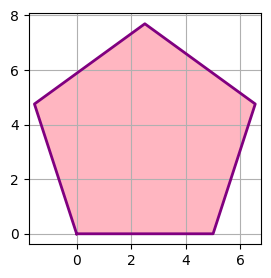

Do you want to change angles or sides? (yes/no): no


In [ ]:
#функция для ообработки ввода пользователя

def input_from_user():
  #ввод кол-ва углов
  while True:
    try:
      n_angles = int(input("Enter a number of angles: "))
      #если кол-во отрицательно, равно 1 или 2, просим ввести кол-во заново
      if n_angles < 0 or n_angles==1 or n_angles ==2:
        raise ValueError("The number of angles can't be negative and can't "
        "be equal 1 or 2")
      else:
        break
    except ValueError as e:
      print(e)

  #если кол-во углов 0, просим ввести радиус
  if n_angles == 0:
    sides = list(map(float, input(f"Enter the radius length: ").split()))
  #если больше нуля, то просим ввести углы и стороны
  else:
    angles_input = input(f"Enter the {n_angles} angles. "
    "You can skip one angle by writing '-' : ").split()
    angles = [float(i) if i != '-' else '-' for i in angles_input]
    sides = list(map(float, input(f"Enter the {n_angles} side lengths: ").split()))

  while True:
      #построение фигуры, вывод информации о ней и графика
      try:
        if n_angles == 0:
          figure = Circle(sides)
          print(figure.get_info())
          figure.drawing()
          break
        elif n_angles == 3:
           figure = Triangle(angles, sides)
           print(figure.get_info())
           figure.drawing()
           break
        elif n_angles == 4:
          figure = Quadrangle(angles, sides)
          print(figure.get_info())
          figure.drawing()
          break
        else:
          figure = Nangle(n_angles, angles, sides)
          print(figure.get_info())
          figure.drawing()
          break

      except ValueError as e:
        print(e)

        #если построение фигуры не прошло, то просим пользователя изменить данные
        #и обновляем переменные для нового построения
        if n_angles == 0:
          new_sides = [float(input("Enter new radius: "))]
          sides = new_sides
        else:
          new_input = input("Change the angles, sides or both? (angles/sides/both): ").lower()
          if new_input == 'angles':
            angles_input = input(f"Enter new {n_angles} angles: ").split()
            new_angles = [float(i) if i != '-' else '-' for i in angles_input]
            angles = new_angles
          elif new_input == 'sides':
            new_sides=list(map(float, input(f"Enter new {n_angles} sides: ").split()))
            sides=new_sides
          elif new_input == 'both':
            angles_input = input(f"Enter new {n_angles} angles: ").split()
            new_angles = [float(i) if i != '-' else '-' for i in angles_input]
            new_sides=list(map(float, input(f"Enter new {n_angles} sides: ").split()))
            angles = new_angles
            sides = new_sides
          else:
            print("Please enter 'angles', 'sides' or 'both'")

  #предлагаем пользователю изменить стороны или углы заданной фигуры
  #если пользователь меняет данные, то выводим информацию о новой фигуре и ее график
  while True:
    try:
      #обработка для круга
      if n_angles == 0:
        choice = input("Do you want to change radius? (yes/no): ").lower()
        if choice == 'yes':
          radius = float(input("Enter new radius: "))
          figure.set_sides(radius)
          print(figure.get_info())
          figure.drawing()
          break
        elif choice == 'no':
          break
        else:
          print("Please enter 'yes' or 'no'")
      #обработка остальных фигур
      else:
        choice = input("Do you want to change angles or sides? (yes/no): ").lower()
        if choice == 'yes':
          change = input("Change the angles or sides? (angles, sides): ").lower()
          if change == 'angles':
            angles_input = input(f"Enter new {n_angles} angles: ").split()
            angles = [float(i) if i != '-' else '-' for i in angles_input]
            figure.set_angles(angles)
            print(figure.get_info())
            figure.drawing()
            break
          elif change == 'sides':
            sides = list(map(float, input(f"Enter new {n_angles} sides: ").split()))
            figure.set_sides(sides)
            print(figure.get_info())
            figure.drawing()
            break
          else:
            print("Please enter 'angles' or 'sides")
        elif choice == 'no':
          break
        else:
          print("Please enter 'yes' or 'no'")

    except ValueError as e:
      print(e)

input_from_user()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#родительский класс
class Shapes:
  #инициализация
  def __init__(self, n_angles, angles, sides):
    self.n_angles = n_angles
    #если пропущен один угол, восполняем его
    if angles.count('-') == 1:
      angles = self._missing_angle(angles)
      self.angles = angles
    elif angles.count('-') > 1:
      raise ValueError("More than one angle is missing")
    else:
      self.angles = angles
    #если фигура не круг, то запускаем проверку на корректность
    #заданных углов
    if n_angles > 0:
      if not self._cheking_angles(angles, n_angles):
        raise ValueError("Angles must be greater than 0 and less than 360\n"
        "and the sum of the angles must match the figure type")
    #запуск проверки на корректность заданных сторон для всех фигур
    if not self._cheking_sides(sides):
      raise ValueError("Side length can't be negative")
    #если фигура не круг, то запускаем базовую проверку на существование фигуры
    if n_angles > 0:
      if not self._cheking_figure(n_angles, angles, sides):
        raise ValueError("No such figure exists")
    self.sides = sides

  #функция восполнения пропущенного угла
  def _missing_angle(self, angles):
    set_angles = [i for i in angles if i != '-']
    missing = (self.n_angles-2)*180 - sum(set_angles)
    if missing <=0:
        raise ValueError(f"The sum of the angles must be {(self.n_angles-2)*180}")
    new_angles = [missing if i == '-' else i for i in angles]
    return new_angles

  #функция проверки углов
  def _cheking_angles(self, angles, n_angles):
    #должны быть больше нуля и меньше 360 градусов
    if not all(0 < i < 360 for i in angles):
      return False
    #сумма углов должна соответсвовать заданной фигуре
    if sum(angles) != (n_angles - 2)*180:
      return False
    return True

  #функция проверки сторон
  def _cheking_sides(self, sides):
    #стороны должны быть больше нуля
    return all(i>0 for i in sides)

  #функция базовой проверки на существование фигуры
  def _cheking_figure(self, n_angles, angles, sides):
    #каждая сторона фигуры должна быть меньше чем сумма остальных сторон
    for i in sides:
      if i >= sum(sides) - i:
        return False
    #если фигура не четырехугольная, то в случае равных углов, стороны так же
    #должны быть равны друг другу
    if n_angles != 4:
      angle = angles[0]
      if all(i == angle for i in angles):
        side = sides[0]
        if not all(i == side for i in sides):
          return False
    return True

  #функция периметра
  def get_perimetr(self):
    return sum(self.sides)

  #функция для отображения информации о фигуре
  def get_info(self):
    info = (
        f"Number of angles: {self.n_angles}\n"
        f"Angles: {' '.join(map(str, self.angles))}\n"
        f"Sides: {' '.join(map(str, self.sides))}\n"
        f"Perimetr: {self.get_perimetr():.3f}\n"
    )
    return info

  #функция рисования фигуры
  def drawing(self):
    plt.figure(figsize=(3,3))

    #отдельно обрабатываем круг
    if self.n_angles == 0:
      radius = self.sides[0]
      circle = plt.Circle((0, 0), radius, edgecolor='purple', facecolor='lightpink', \
                          linewidth=2)
      plt.gca().add_patch(circle)

    #рисование многоугольников
    else:
      x, y = [0], [0]
      current_angle = 0

      for i in range(self.n_angles):
        if i==0:
          angle = self.angles[i]
        else:
          angle = 180 + self.angles[i]
        current_angle+=np.radians(angle)
        x1=x[-1]+self.sides[i]*np.cos(current_angle)
        y1= y[-1]+self.sides[i]*np.sin(current_angle)
        x.append(x1)
        y.append(y1)
      x.append(x[0])
      y.append(y[0])

      plt.plot(x, y, color="purple", linewidth=2)
      plt.fill(x, y, color='lightpink')

    plt.axis('equal')
    plt.grid(True)
    plt.show()


In [ ]:
import math

#класс круга
class Circle(Shapes):
  #инициализация
  def __init__(self, sides):
    #должен быть один радиус
    if len(sides)!=1:
      raise ValueError("Should be one radius")
    super().__init__(n_angles=0, angles=[], sides=sides)
    self.name = "Circle"

  #функция для задания нового радиуса
  def set_sides(self, new_radius):
    #проверка нового радиуса
    if not self._cheking_sides([new_radius]):
      raise ValueError("Radius must be greater than 0")
    self.sides = [new_radius]

  #функция определения площади
  def get_sq(self):
    square = math.pi * self.sides[0]**2
    return square

  #для круга иначе вычисляем периметр
  def get_circle_perimetr(self):
    perimetr = 2*math.pi*self.sides[0]
    return perimetr

  #подгон информации под круг
  def get_info(self):
    info = super().get_info()
    info = info.replace(f"Perimetr: {self.get_perimetr():.3f}\n",
                        f"Perimetr: {self.get_circle_perimetr():.3f}\n")
    info = f"\nINFO ABOUT YOUR FIGURE\n" + f"Figure name: {self.name}\n" + info
    info += (
        f"Square: {self.get_sq():.3f}\n"
    )
    return info

In [ ]:
import math

#класс треугольников
class Triangle(Shapes):
  #инициализация
  def __init__(self, angles, sides):
    #трегуольник должен иметь 3 стороны и 3 угла
    if len(sides)!=3 or len(angles)!=3:
      raise ValueError("Triangle must have 3 angles and 3 sides")
    super().__init__(n_angles=3, angles = angles, sides = sides)
    self.name = "Triangle"

  #функция задания новых углов
  def set_angles(self, new_angles):
    #проверка на кол-во углов
    if len(new_angles)!=3:
      raise ValueError("Triangle must have 3 angles")
    #если один угол пропущен восполняем его
    if new_angles.count('-')==1:
      new_angles = self._missing_angle(new_angles)
      self.angles = new_angles
    elif new_angles.count('-') > 1:
      raise ValueError("More that one angle is missing")
    else:
      self.angles = new_angles
    #проверка на корректность углов
    if not self._cheking_angles(self.angles, self.n_angles):
      raise ValueError("Angles must be greater than 0 and less than 360\nand"
      "the sum of the angles must match the figure type")
    #если все стороны равны, то углы должны быть равны тоже
    side = self.sides[0]
    if all(i == side for i in self.sides):
      angle = new_angles[0]
      if not all(i == angle for i in new_angles):
        raise ValueError("No such figure exists")

  #функция задания новых сторон
  def set_sides(self, new_sides):
    #проверка на кол-во сторон
    if len(new_sides)!=3:
      raise ValueError("Triangle must have 3 sides")
    #проверка корректности сторон
    if not self._cheking_sides(new_sides):
      raise ValueError("Side length can't be negative")
    #проверка на существование новой фигуры
    if not self._cheking_figure(self.n_angles, self.angles, new_sides):
      raise ValueError("No such figure exists")
    self.sides = new_sides

  #функция определения площади
  def get_sq(self):
    side_1, side_2, side_3 = self.sides
    angle_1, angle_2, angle_3 = map(math.radians, self.angles)

    #через две стороны и угол между ними
    square_1 = 0.5 * side_1 * side_2 * math.sin(angle_2)

    #через высоту и основание
    height = side_3 * math.sin(angle_3)
    square_2 = 0.5 * height * side_2

    #по формуле Герона
    perimetr_2 = self.get_perimetr()/2
    square_3 = math.sqrt(perimetr_2*(perimetr_2-side_1)*(perimetr_2-side_2)*
     (perimetr_2-side_3))

    return square_1, square_2, square_3

  #подгон информации под треугольник
  def get_info(self):
    sq1, sq2, sq3 = self.get_sq()
    info=super().get_info()
    info =  f"\nINFO ABOUT YOUR FIGURE\n" + f"Figure name: {self.name}\n" + info
    info+= (
        f"Square 1: {sq1:.3f}\n"
        f"Square 2: {sq2:.3f}\n"
        f"Square 3: {sq3:.3f}\n"
    )
    return info

In [ ]:
import math

#класс четырехугольников
class Quadrangle(Shapes):
  #инициализация
  def __init__(self, angles, sides):
    #4угольник должен иметь 4 стороны и 4 угла
    if len(sides)!=4 or len(angles)!=4:
      raise ValueError("Quadrangle must have 4 angles and 4 sides")
    angle_1, angle_2, angle_3, angle_4 = angles
    side_1, side_2, side_3, side_4 = sides

    #если углы равны, то стороны должны быть или равны (квадрат),
    #или попарно равны (прямоугольник)
    if angle_1==angle_2==angle_3==angle_4:
      if not (side_1==side_2==side_3==side_4 or \
             (side_1==side_3 and side_1!=side_2 and side_2==side_4)):
             raise ValueError("If the angles are equal, there must be "
             "a quadrate or rectangle")
    #если углы попарно равны, то стороны должны быть или равны (ромб),
    #или попарно равны (параллелограм)
    if angle_1==angle_3 and angle_1!=angle_2 and angle_2==angle_4:
      if not(side_1==side_2==side_3==side_4 or \
             (side_1==side_3 and side_1!=side_2 and side_2==side_4)):
             raise ValueError("If the angles are equal in pairs, there must "
             "be a rhombus or parallelogram")

    super().__init__(n_angles=4, angles = angles, sides = sides)
    self.name = "Quadrangle"

  #функуция задания новых углов
  def set_angles(self, new_angles):
    #проверка на кол-во
    if len(new_angles)!=4:
      raise ValueError("Quadrangle must have 4 angles")
    #восполнение пропущенного угла
    if new_angles.count('-')==1:
      new_angles = self._missing_angle(new_angles)
      self.angles = new_angles
    elif new_angles.count('-') > 1:
      raise ValueError("More that one angle is missing")
    else:
      self.angles = new_angles
    #проверка на корректность углов
    if not self._cheking_angles(self.angles, self.n_angles):
      raise ValueError("Angles must be greater than 0 and less than 360\nand"
      "the sum of the angles must match the figure type")

    #если стороны равны, то углы должны быть или равны(квадрат),
    #или попарно равны (ромб)
    side_1, side_2, side_3, side_4 = self.sides
    angle_1, angle_2, angle_3, angle_4 = new_angles
    if side_1==side_2==side_3==side_4:
      if not(angle_1==angle_2==angle_3==angle_4 or \
             (angle_1==angle_3 and angle_1!=angle_2 and angle_2==angle_4)):
             raise ValueError("If the sides are equal, there must be "
             "a quadrate or rhombus")
    #если стороны попарно равны, то углы должны быть или равны(прямоугольник),
    #или попарно равны (параллелограм)
    if side_1==side_3 and side_1!=side_2 and side_2==side_4:
      if not(angle_1==angle_2==angle_3==angle_4 or \
             (angle_1==angle_3 and angle_1!=angle_2 and angle_2==angle_4)):
             raise ValueError("If the sides are equal in pairs, there must be "
             "a rectangle or parallelogram")

  #функция задания новых сторон
  def set_sides(self, new_sides):
    #проверка на кол-во
    if len(new_sides)!=4:
      raise ValueError("Quadrangle must have 4 sides")
    #проверка на корректность сторон
    if not self._cheking_sides(new_sides):
      raise ValueError("Side length can't be negative")

    #если углы равны, то стороны должны быть или равны (квадрат),
    #или попарно равны (прямоугольник)
    side_1, side_2, side_3, side_4 = new_sides
    angle_1, angle_2, angle_3, angle_4 = self.angles
    if angle_1==angle_2==angle_3==angle_4:
      if not (side_1==side_2==side_3==side_4 or \
             (side_1==side_3 and side_1!=side_2 and side_2==side_4)):
             raise ValueError("If the angles are equal, there must be "
             "a quadrate or rectangle")
    #если углы попарно равны, то стороны должны быть или равны (ромб),
    #или попарно равны (параллелограм)
    if angle_1==angle_3 and angle_1!=angle_2 and angle_2==angle_4:
      if not(side_1==side_2==side_3==side_4 or \
             (side_1==side_3 and side_1!=side_2 and side_2==side_4)):
             raise ValueError("If the angles are equal in pairs, there must "
             "be a rhombus or parallelogram")
    #проверка на существование фигуры
    if not self._cheking_figure(self.n_angles, self.angles, new_sides):
      raise ValueError("No such figure exists")
    self.sides = new_sides

  #функция для поиска диагоналей произвольного 4угольника и угла между ними
  def _get_sq_for_arbitr(self, side_1, side_2, side_4, angle_2, angle_1):
    #диагонали нахожу по теореме косинусов для треугольников
    d1 = math.sqrt(side_1**2 + side_2**2 - 2*side_1*side_2*math.cos(angle_2))
    d2 = math.sqrt(side_1**2 + side_4**2 - 2*side_1*side_4*math.cos(angle_1))

    #для нахождения угла между диагоналями сначала нахожу два других угла
    #в треугольнике, который образуют эти диагоняли, используя теорему синусов
    y_radians = math.asin((side_4*math.sin(angle_1))/d2)
    y_degrees = math.degrees(y_radians)

    x_radians = math.asin((side_2*math.sin(angle_2))/d1)
    x_degrees = math.degrees(x_radians)

    #angle - угол между диагоналями
    angle = 180 - (x_degrees+y_degrees)
    angle_radians = math.radians(angle)
    return d1, d2, angle_radians

  #функция определения названия 4угольника и ее площади
  def get_sq(self):
    side_1, side_2, side_3, side_4 = self.sides
    angle_1_degrees, angle_2_degrees, angle_3_degrees, angle_4_degrees = self.angles
    angle_1, angle_2, angle_3, angle_4 = map(math.radians, self.angles)

    if side_1==side_2==side_3==side_4:

      #квадрат
      if angle_1==angle_2==angle_3==angle_4:
        self.name = "Quadrate"
        square = side_1**2
      #ромб
      elif angle_1==angle_3 and angle_1!=angle_2 and angle_2==angle_4:
        self.name = "Rhombus"
        square = side_1*side_4*math.sin(angle_1)

    elif side_1==side_3 and side_1!=side_2 and side_2==side_4:

      #прямоугольник
      if angle_1==angle_2==angle_3==angle_4:
        self.name = "Rectangle"
        square = side_1*side_2
      #параллелограм
      elif angle_1==angle_3 and angle_1!=angle_2 and angle_2==angle_4:
        self.name = "Parallelogram"
        square = side_4*side_3*math.sin(angle_4)
    #трапеция
    elif ((angle_1_degrees + angle_4_degrees) == 180 and side_1!=side_3):
       self.name = "Trapezoid"
       height = side_4*math.sin(angle_4)
       square = (side_1+side_3)*0.5*height
    elif((angle_4_degrees+angle_3_degrees) == 180 and side_4!=side_2):
      self.name = "Trapezoid"
      height = side_3*math.sin(angle_3)
      square = (side_4+side_2)*0.5*height

    #произвольный 4угольник
    else:
      self.name = "Arbitrary quadrangle"
      d1, d2, angle = self._get_sq_for_arbitr(side_1, side_2, side_4, angle_2, angle_1)
      square = 0.5*d1*d2*math.sin(angle)

    return square

  #подгон информации под 4угольник
  def get_info(self):
    sq = self.get_sq()
    info=super().get_info()
    info =  f"\nINFO ABOUT YOUR FIGURE\n" + f"Figure name: {self.name}\n" + info
    info+= (
        f"Square: {sq:.3f}\n"
    )
    return info

In [ ]:
import math

#класс n-угольников
class Nangle(Shapes):
  #инициализация
  def __init__(self, n_angles, angles, sides):
    #проверка на кол-во сторон и углов
    if len(sides)!=n_angles or len(angles)!=n_angles:
      raise ValueError(f"{n_angles}-angle must have {n_angles} angles and {n_angles} sides")
    super().__init__(n_angles=n_angles, angles = angles, sides = sides)
    self.name = f"{n_angles}-angle"

  #функция задания новых углов
  def set_angles(self, new_angles):
    #проверка на кол-во углов
    if len(new_angles)!=self.n_angles:
      raise ValueError(f"{self.n_angles}-angle must have {self.n_angles} angles")
    #восполнение пропущенного угла
    if new_angles.count('-')==1:
      new_angles = self._missing_angle(new_angles)
      self.angles = new_angles
    elif new_angles.count('-') > 1:
      raise ValueError("More that one angle is missing")
    else:
      self.angles = new_angles
    #проверка на корректность углов
    if not self._cheking_angles(self.angles, self.n_angles):
      raise ValueError("Angles must be greater than 0 and less than 360\nand"
      "the sum of the angles must match the figure type")
    #если все стороны равны, то углы должны быть тоже равны
    side = self.sides[0]
    if all(i == side for i in self.sides):
      angle = new_angles[0]
      if not all(i == angle for i in new_angles):
        raise ValueError("No such figure exists")

  #функция задания новых сторон
  def set_sides(self, new_sides):
    #проверка на кол-во сторон
    if len(new_sides)!=self.n_angles:
      raise ValueError(f"{self.n_angles}-angle must have {self.n_angles} sides")
    #проверка на корректность сторон
    if not self._cheking_sides(new_sides):
      raise ValueError("Side length can't be negative")
    #проверка на существование фигуры
    if not self._cheking_figure(self.n_angles, self.angles, new_sides):
      raise ValueError("No such figure exists")
    self.sides = new_sides

  #функция определения правильного многоугольника
  def _if_regular(self):
    angle = self.angles[0]
    if all(i == angle for i in self.angles):
      return True
    else:
      return False

  #функция определения площади
  def get_sq(self):
    #если правильный многоугольник, то находим
    if self._if_regular():
      self.name = f"Regular {self.n_angles}-angle"
      n = self.n_angles
      length_side = self.sides[0]
      square = (n*(length_side**2)/(4*math.tan(math.pi/n)))
    #иначе не находим :(
    else:
      square = -1
    return square

  #подгон информации под n-угольник
  def get_info(self):
    sq = self.get_sq()
    if sq==-1:
      str = f"Square: has not been determined\n"
    else:
      str = f"Square: {sq:.3f}\n"
    info=super().get_info()
    info =  f"\nINFO ABOUT YOUR FIGURE\n" + f"Figure name: {self.name}\n" + info + str
    return info